In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
import sys

df = pd.read_csv("data/gender_voice_dataset.csv")
INPUT_SHAPE = 20
LABEL = 'label'
SPLIT_SIZE = 10
EPOCHS = 20

W1017 10:19:39.492794 10280 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
from sklearn.preprocessing import LabelEncoder
x = df.drop([LABEL], 1)
y = df[LABEL]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
#print(y)
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, Y_train = [], []
for i in range(0,SPLIT_SIZE):
    X_train.append(x[int((i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    Y_train.append(y[(int(i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    
#print(Y_train)

In [3]:
def model_build() :
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Dense(10, input_shape = (INPUT_SHAPE,), activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(10, activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model1

In [4]:
models = []
metrics = []
for i in range (0,SPLIT_SIZE):
    models.append(model_build())
    models[i].fit(X_train[i], Y_train[i], epochs = EPOCHS)

for i in range(0,SPLIT_SIZE):
    metrics.append(models[i].evaluate(x_test, y_test))

W1017 10:19:50.720956 10280 deprecation.py:506] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1017 10:19:51.049012 10280 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1017 10:19:51.965500 10280 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.p

Train on 253 samples
Epoch 1/20
253/253 [==============================] - 0s 1ms/sample - loss: 1.4499 - acc: 0.5296
Epoch 2/20
253/253 [==============================] - 0s 102us/sample - loss: 1.2669 - acc: 0.5099
Epoch 3/20
253/253 [==============================] - 0s 117us/sample - loss: 1.0637 - acc: 0.4862
Epoch 4/20
253/253 [==============================] - 0s 109us/sample - loss: 0.9075 - acc: 0.4941
Epoch 5/20
253/253 [==============================] - 0s 112us/sample - loss: 0.7515 - acc: 0.4743
Epoch 6/20
253/253 [==============================] - 0s 56us/sample - loss: 0.7277 - acc: 0.4783
Epoch 7/20
253/253 [==============================] - 0s 86us/sample - loss: 0.7255 - acc: 0.4980
Epoch 8/20
253/253 [==============================] - 0s 85us/sample - loss: 0.7163 - acc: 0.4980
Epoch 9/20
253/253 [==============================] - 0s 81us/sample - loss: 0.7203 - acc: 0.4901
Epoch 10/20
253/253 [==============================] - 0s 59us/sample - loss: 0.7231 - acc: 0.

254/254 [==============================] - 0s 68us/sample - loss: 0.9588 - acc: 0.5433
Epoch 3/20
254/254 [==============================] - 0s 60us/sample - loss: 0.9257 - acc: 0.5433
Epoch 4/20
254/254 [==============================] - 0s 66us/sample - loss: 0.9038 - acc: 0.5433
Epoch 5/20
254/254 [==============================] - 0s 65us/sample - loss: 0.8716 - acc: 0.5433
Epoch 6/20
254/254 [==============================] - 0s 61us/sample - loss: 0.8461 - acc: 0.5433
Epoch 7/20
254/254 [==============================] - 0s 64us/sample - loss: 0.8242 - acc: 0.5433
Epoch 8/20
254/254 [==============================] - 0s 67us/sample - loss: 0.8044 - acc: 0.5433
Epoch 9/20
254/254 [==============================] - 0s 62us/sample - loss: 0.7756 - acc: 0.5433
Epoch 10/20
254/254 [==============================] - 0s 59us/sample - loss: 0.7574 - acc: 0.5433
Epoch 11/20
254/254 [==============================] - 0s 60us/sample - loss: 0.7258 - acc: 0.5472
Epoch 12/20
254/254 [========

Epoch 4/20
253/253 [==============================] - 0s 60us/sample - loss: 1.0151 - acc: 0.4901
Epoch 5/20
253/253 [==============================] - 0s 53us/sample - loss: 0.9784 - acc: 0.4862
Epoch 6/20
253/253 [==============================] - 0s 76us/sample - loss: 0.9476 - acc: 0.5020
Epoch 7/20
253/253 [==============================] - 0s 63us/sample - loss: 0.9124 - acc: 0.5020
Epoch 8/20
253/253 [==============================] - 0s 65us/sample - loss: 0.8787 - acc: 0.4941
Epoch 9/20
253/253 [==============================] - 0s 60us/sample - loss: 0.8432 - acc: 0.4941
Epoch 10/20
253/253 [==============================] - 0s 58us/sample - loss: 0.8140 - acc: 0.4901
Epoch 11/20
253/253 [==============================] - 0s 68us/sample - loss: 0.7882 - acc: 0.4862
Epoch 12/20
253/253 [==============================] - 0s 66us/sample - loss: 0.7652 - acc: 0.5099
Epoch 13/20
253/253 [==============================] - 0s 64us/sample - loss: 0.7449 - acc: 0.5178
Epoch 14/20
253/

In [5]:
sum = 0
for i in metrics:
    print(i[1])
    sum = sum + i[1]

average = sum/SPLIT_SIZE
print(average)

0.5851735
0.6829653
0.5977918
0.49369085
0.5094637
0.5157729
0.49369085
0.61198735
0.5094637
0.5252366
0.5525236546993255


In [26]:
m = models[0].get_weights()
for num in range(1,SPLIT_SIZE):
    a = models[num].get_weights()
    m = numpy.add(m,a)
m /= SPLIT_SIZE
model = model_build()
model.set_weights(m)
loss, acc = model.evaluate(x_test, y_test)
print(acc)
print(loss)  

634/634 [==============================] - 0s 319us/sample - loss: 0.7441 - acc: 0.5931
0.59305996
0.7440673221925079


In [33]:
#Selecting random 5 models
import random
list2 = []
for i in range(0,5):
    list2.append(random.randrange(0,10))
print(list2)
m3 = models[list2[0]].get_weights()
for i in list2:
    a = models[i].get_weights()
    m3 = numpy.add(m3,a)
    print(i)

m3 /= 5
print(all([numpy.allclose(x, y) for x, y in zip(m, m3)]))
model3 = model_build()
model3.set_weights(m3)
loss, acc = model3.evaluate(x_test, y_test)
print(acc)
print(loss)  

[9, 2, 5, 7, 0]
9
2
5
7
0
False
634/634 [==============================] - 0s 355us/sample - loss: 1.1411 - acc: 0.5946
0.5946372
1.14112270254442


In [59]:
"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
num_weights = 10
sol_per_pop = 10

num_parents_mating = int(sol_per_pop/2)
best_outputs = []
average_outputs = []
num_generations = 5
no_of_layers = len(models[0].get_weights())
print(no_of_layers)


# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(size=pop_size)
for i in range(0,sol_per_pop):
    numsum = 0
    for j in range(0,num_weights):
        numsum += new_population[i][j]
    for j in range(0,num_weights):
        new_population[i][j] /= numsum
print(new_population)

4
[[1.09480130e-01 7.10919367e-02 1.39628449e-01 1.06112382e-02
  8.73712613e-02 1.09871438e-01 1.56446235e-01 1.44975564e-01
  9.22528753e-02 7.82708723e-02]
 [9.40850800e-02 1.11180156e-02 1.62078133e-01 1.40453001e-01
  3.21573371e-03 8.03624622e-02 1.57380362e-01 1.43258256e-01
  6.82313455e-02 1.39817612e-01]
 [9.28042417e-02 3.32681066e-02 1.78314739e-01 5.53255730e-03
  1.30172313e-01 5.46007161e-02 1.90227846e-01 1.27020284e-01
  1.45398686e-01 4.26605097e-02]
 [1.95802575e-01 8.75432589e-03 3.31325577e-02 9.84925636e-03
  8.24569383e-03 9.97343971e-02 1.51766421e-01 2.18627618e-01
  2.18904443e-01 5.51827131e-02]
 [3.05871448e-03 7.08058048e-02 1.34214564e-01 9.86332214e-02
  1.56245635e-01 1.30805224e-01 6.55794924e-02 1.64018354e-01
  5.12049584e-02 1.25434031e-01]
 [7.39278144e-02 1.80418340e-01 7.25169859e-03 9.54019231e-02
  4.85804135e-02 1.58359352e-01 1.29526687e-01 1.60433086e-01
  9.43955360e-02 5.17051491e-02]
 [1.73557574e-01 5.95125061e-02 1.66391790e-01 6.9842654

In [60]:
def cal_pop_fitness(x_test, y_test, pop, num_weights):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.zeros(num_weights)
    for i,weights in enumerate(pop):
        x = float(weights[0])
        m = numpy.multiply(x,models[0].get_weights())
        for num in range(1,num_weights):
            x = float(weights[num])
            a = numpy.multiply(x,models[num].get_weights())
            m = numpy.add(m,a)
        model = model_build()
        model.set_weights(m)
        loss, acc = model.evaluate(x_test, y_test)
        fitness[i] = acc
    
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.argmax(fitness)
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(0, 1.0, 1)/10
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    
    for i in range(offspring_crossover.shape[0]):
        numsum = 0
        for j in range(num_weights):
            numsum += offspring_crossover[i][j]
        for j in range(0,num_weights):
            offspring_crossover[i][j] /= numsum
    return offspring_crossover


In [61]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(x_test, y_test, new_population, num_weights)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(fitness))
    average_outputs.append(numpy.sum(fitness)/num_weights)
    # The best result in the current iteration.
    print("Best result : ", numpy.max(fitness))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
634/634 [==============================] - 1s 1ms/sample - loss: 0.8005 - acc: 0.5063
Fitness
[0.50946373 0.53627759 0.50157726 0.46687698 0.54258674 0.47476339
 0.52365929 0.46687698 0.50315458 0.50630915]
Best result :  0.5425867438316345
Parents
[[0.00305871 0.0708058  0.13421456 0.09863322 0.15624564 0.13080522
  0.06557949 0.16401835 0.05120496 0.12543403]
 [0.09408508 0.01111802 0.16207813 0.140453   0.00321573 0.08036246
  0.15738036 0.14325826 0.06823135 0.13981761]
 [0.17355757 0.05951251 0.16639179 0.00698427 0.13828989 0.17672251
  0.09810825 0.06146365 0.00297204 0.11599752]
 [0.10948013 0.07109194 0.13962845 0.01061124 0.08737126 0.10987144
  0.15644624 0.14497556 0.09225288 0.07827087]
 [0.07298453 0.06981979 0.16527187 0.01686206 0.21404679 0.00332182
  0.21682628 0.08443576 0.08824494 0.06818616]]
Crossover
[[0.00305871 0.0708058  0.13421456 0.09863322 0.15624564 0.08036246
  0.15738036 0.14325826 0.06823135 0.13981761]
 [0.09408508 0.01111802 0.16207813

634/634 [==============================] - 1s 1ms/sample - loss: 0.7856 - acc: 0.4732
Fitness
[0.55993688 0.55835962 0.54258674 0.53785491 0.53785491 0.54574132
 0.51892745 0.54574132 0.50473183 0.47318611]
Best result :  0.5599368810653687
Parents
[[0.10703313 0.06950296 0.1365076  0.01037407 0.13667499 0.00324758
  0.21197998 0.08254853 0.08627257 0.15585859]
 [0.10183475 0.06612734 0.1298777  0.00987022 0.1556477  0.12445227
  0.06239443 0.15605231 0.04871804 0.14502526]
 [0.09403522 0.06106264 0.11993037 0.00911426 0.2033476  0.10933902
  0.05481736 0.1371016  0.04280181 0.16845013]
 [0.00282494 0.06539425 0.1239568  0.09109487 0.14586208 0.06166658
  0.12076669 0.10993001 0.0523577  0.22614606]
 [0.00305871 0.0708058  0.13421456 0.09863322 0.15624564 0.13080522
  0.06557949 0.16401835 0.05120496 0.12543403]]
Crossover
[[0.10703313 0.06950296 0.1365076  0.01037407 0.13667499 0.12445227
  0.06239443 0.15605231 0.04871804 0.14502526]
 [0.10183475 0.06612734 0.1298777  0.00987022 0.15

634/634 [==============================] - 1s 2ms/sample - loss: 0.7883 - acc: 0.6215
Best solution :  [0.10037275 0.06517798 0.12801311 0.00972852 0.14912606 0.11670795
 0.05851179 0.1463416  0.04568645 0.18033379]
Best solution fitness :  0.6230283975601196


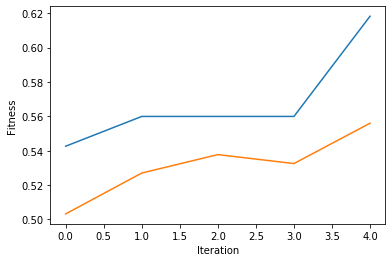

In [63]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(x_test,y_test, new_population, num_weights)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.argmax(fitness)

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

x = numpy.arange(num_generations)
import matplotlib.pyplot
matplotlib.pyplot.plot(x, best_outputs)
matplotlib.pyplot.plot(x, average_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

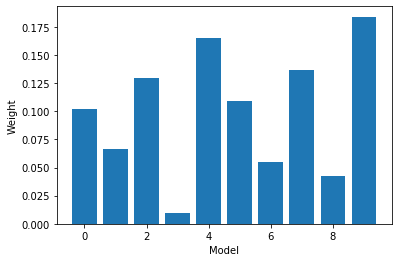

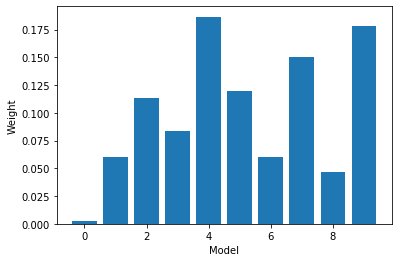

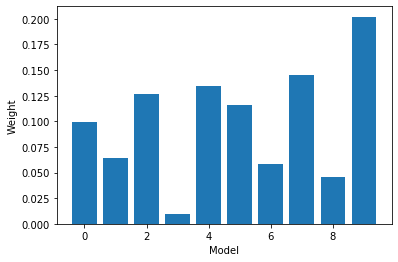

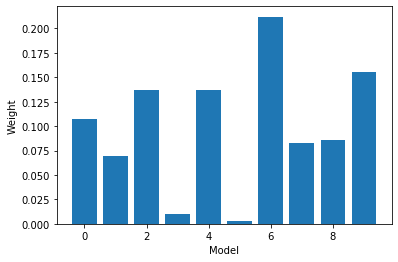

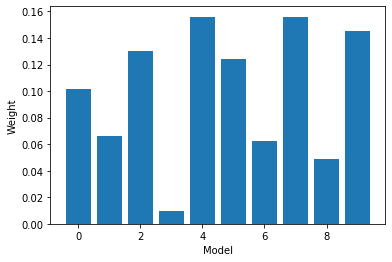

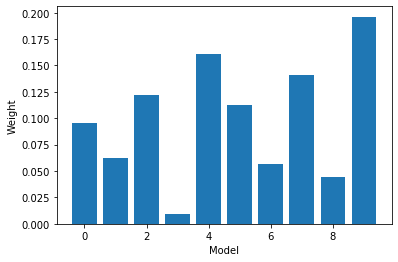

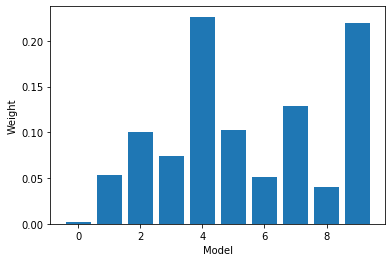

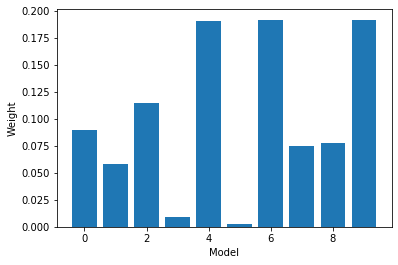

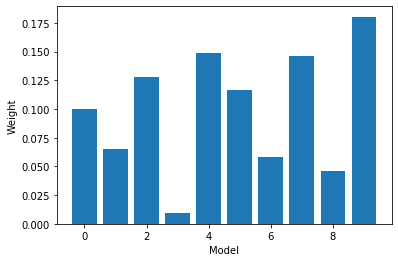

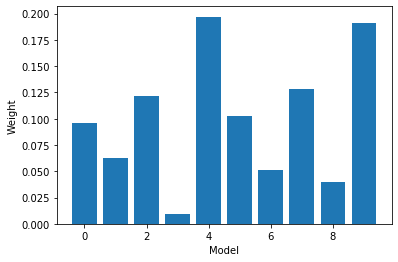

In [64]:
x = numpy.arange(num_weights)
for i in range(sol_per_pop):
    matplotlib.pyplot.bar(x, new_population[i])
    matplotlib.pyplot.xlabel("Model")
    matplotlib.pyplot.ylabel("Weight")
    matplotlib.pyplot.show()

In [68]:
fitness = cal_pop_fitness(x_test,y_test, new_population, num_weights)
print(fitness)
people = select_mating_pool(new_population, fitness, 5)
print(cal_pop_fitness(x_test,y_test, people, num_weights))

634/634 [==============================] - 1s 2ms/sample - loss: 0.7883 - acc: 0.6215
[0.6182965  0.58044165 0.56940061 0.55993688 0.55835962 0.61987382
 0.5615142  0.59779179 0.6230284  0.62145108]
634/634 [==============================] - 1s 2ms/sample - loss: 0.8906 - acc: 0.5978
[0.6230284  0.62145108 0.61987382 0.6182965  0.59779179 0.
 0.         0.         0.         0.        ]


In [66]:
print(new_population)

[[0.10167967 0.06602663 0.12967992 0.00985519 0.16526027 0.10917251
  0.05473388 0.13689281 0.04273662 0.1839625 ]
 [0.00258338 0.05980231 0.11335711 0.08330524 0.18663595 0.11961991
  0.05997171 0.14999295 0.04682636 0.17790508]
 [0.09931119 0.06448864 0.12665922 0.00962563 0.13444562 0.11547363
  0.05789296 0.14479387 0.04520326 0.20210598]
 [0.10703313 0.06950296 0.1365076  0.01037407 0.13667499 0.00324758
  0.21197998 0.08254853 0.08627257 0.15585859]
 [0.10183475 0.06612734 0.1298777  0.00987022 0.1556477  0.12445227
  0.06239443 0.15605231 0.04871804 0.14502526]
 [0.09555721 0.06205096 0.12187147 0.00926177 0.16130104 0.11241722
  0.05636062 0.14096139 0.0440068  0.19621152]
 [0.00229768 0.05318862 0.10082065 0.0740923  0.22646403 0.1027031
  0.05149043 0.12878074 0.04020411 0.21995834]
 [0.0897422  0.05827493 0.11445515 0.00869816 0.19079205 0.00293466
  0.19155494 0.07459468 0.0779599  0.19099333]
 [0.10037275 0.06517798 0.12801311 0.00972852 0.14912606 0.11670795
  0.05851179 

In [67]:
for i in range(10):
    print(numpy.sum(new_population[i]))

1.0000000000000002
1.0
0.9999999999999998
1.0000000000000004
0.9999999999999999
1.0
1.0
0.9999999999999998
1.0
1.0
